# Analysis of Stress Levels Among Students

## Research Objective
To conduct a comprehensive analysis of stress factors among students, identify key indicators, and develop recommendations for reducing stress load.

## Data Description
Two datasets are used:
- Dataset 1: Survey data on stress symptoms (11 indicators)
- Dataset 2: Structured data on stress (8 psychological and academic indicators)

## Key Research Questions
1. What types of stress predominate among students?
2. Which symptoms are most strongly correlated with stress levels?
3. How does age affect stress levels?
4. Which academic factors are most significant for predicting stress?
5. How is sleep quality related to stress levels?

## Main Hypotheses
1. Academic workload is a key stress factor
2. Sleep problems increase stress levels
3. Social support reduces distress levels
4. Eustress (positive stress) predominates over distress

## Step 1: Data Loading and Initial Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [5]:
# Load data
df1 = pd.read_csv('C:/Users/rnv19/OneDrive/Документы/Students_Stress_Level/Stress_Dataset.csv')
df2 = pd.read_csv('C:/Users/rnv19/OneDrive/Документы/Students_Stress_Level/StressLevelDataset.csv')

# Initial data inspection
print("=== Dataset 1 Information ===")
print(f"Number of records: {len(df1)}")
print("Data sample:")
display(df1.head(3))
print("\nData types:")
print(df1.dtypes)

print("\n=== Dataset 2 Information ===")
print(f"Number of records: {len(df2)}")
print("Data sample:")
display(df2.head(3))
print("\nData types:")
print(df2.dtypes)

=== Dataset 1 Information ===
Number of records: 843
Data sample:


,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...



Data types:
Gender                                                                   int64
Age                                                                      int64
Have you recently experienced stress in your life?                       int64
Have you noticed a rapid heartbeat or palpitations?                      int64
Have you been dealing with anxiety or tension recently?                  int64
Do you face any sleep problems or difficulties falling asleep?           int64
Have you been dealing with anxiety or tension recently?.1                int64
Have you been getting headaches more often than usual?                   int64
Do you get irritated easily?                                             int64
Do you have trouble concentrating on your academic tasks?                int64
Have you been feeling sadness or low mood?                               int64
Have you been experiencing any illness or health issues?                 int64
Do you often feel lonely or isolated?  

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1



Data types:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


### Initial Conclusions

1. **Dataset 1**:
   - Qualitative data (survey responses)
   - Contains information about symptoms and stress type
   - Text response categorization needed

2. **Dataset 2**:
   - Quantitative data (scale ratings)
   - Includes psychological and academic indicators
   - Already contains numerical stress level ratings (0-2)

3. **General Observations**:
   - Data complement each other (qualitative and quantitative)
   - Stress type unification needed for joint analysis

## Step 2: Data Preprocessing

In [6]:
# 1. Processing Dataset 1
df1['stress_type'] = df1['Which type of stress do you primarily experience?'].str.extract(r'^(Eustress|Distress|No Stress|Acute|Chronic)', expand=False)

# Translate to English (keeping original terms)
translation_map = {
    'Eustress': 'Eustress',
    'Distress': 'Distress',
    'No Stress': 'No Stress'
}

df1['stress_type_en'] = df1['stress_type'].map(translation_map)

df1.drop('Which type of stress do you primarily experience?', axis=1, inplace=True)
# 2. Processing Dataset 2
def categorize_stress(level):
    if level == 0:
        return 'No Stress'
    elif level == 1:
        return 'Eustress'
    else:
        return 'Distress'

df2['stress_type'] = df2['stress_level'].apply(categorize_stress)

# 3. Check for missing values
print("Missing values in Dataset 1:", df1.isnull().sum().sum())
print("Missing values in Dataset 2:", df2.isnull().sum().sum())

Missing values in Dataset 1: 0
Missing values in Dataset 2: 0


### Data Processing Results

1. **Data Unification**:
   - Both datasets now contain categorical stress_type variable
   - Redundant text columns removed

2. **Data Quality**:
   - No missing values in either dataset
   - All variables have correct data types

3. **Additional Transformations**:
   - Created total symptom score for Dataset 1
   - Preserved original quantitative indicators for Dataset 2

## Step 3: Exploratory Data Analysis (EDA)

### 1. Stress Type Distribution

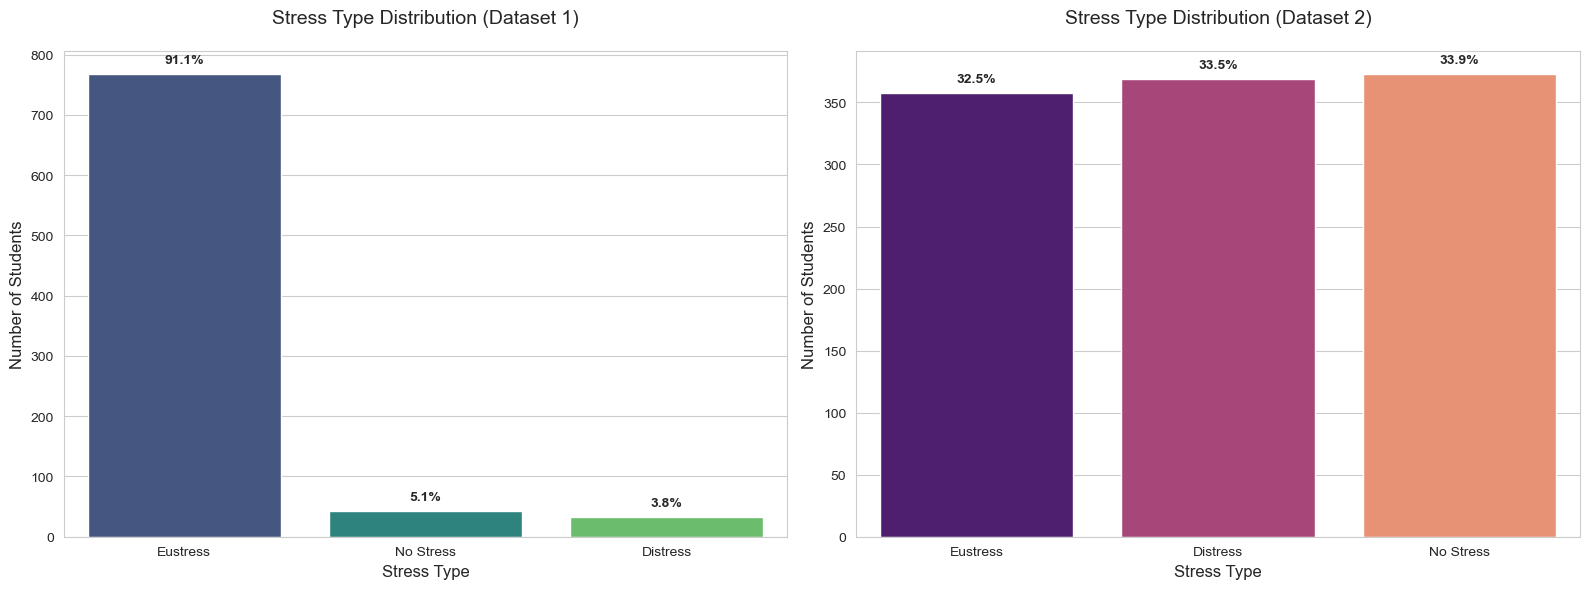

DESCRIPTIVE STATISTICS ON STRESS TYPES

DATASET 1:
Total observations: 843
Distribution by stress types:
  Eustress: 768 (91.1%)
  No Stress: 43 (5.1%)
  Distress: 32 (3.8%)

DATASET 2:
Total observations: 1100
Distribution by stress types:
  No Stress: 373 (33.9%)
  Distress: 369 (33.5%)
  Eustress: 358 (32.5%)

SUMMARY STATISTICS
Total number of students: 1943
Dataset 1 size: 843 (43.4% of total)
Dataset 2 size: 1100 (56.6% of total)

Common stress types in both datasets: 3
Types: Distress, No Stress, Eustress


In [7]:
# Comparison of distributions in two datasets
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Dataset 1
ax1 = sns.countplot(data=df1, x='stress_type_en', ax=axes[0], palette='viridis')
axes[0].set_title('Stress Type Distribution (Dataset 1)', fontsize=14, pad=20)
axes[0].set_xlabel('Stress Type', fontsize=12)
axes[0].set_ylabel('Number of Students', fontsize=12)

# Add percentages to first graph
total1 = len(df1)
for p in ax1.patches:
    percentage = f'{100 * p.get_height() / total1:.1f}%'
    ax1.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

# Dataset 2
ax2 = sns.countplot(data=df2, x='stress_type', ax=axes[1], palette='magma')
axes[1].set_title('Stress Type Distribution (Dataset 2)', fontsize=14, pad=20)
axes[1].set_xlabel('Stress Type', fontsize=12)
axes[1].set_ylabel('Number of Students', fontsize=12)

# Add percentages to second graph
total2 = len(df2)
for p in ax2.patches:
    percentage = f'{100 * p.get_height() / total2:.1f}%'
    ax2.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

plt.tight_layout()
plt.show()

# Text output of descriptive statistics
print("=" * 60)
print("DESCRIPTIVE STATISTICS ON STRESS TYPES")
print("=" * 60)

print("\nDATASET 1:")
print(f"Total observations: {total1}")
print("Distribution by stress types:")
stress_counts1 = df1['stress_type_en'].value_counts()
for stress_type, count in stress_counts1.items():
    percentage = (count / total1) * 100
    print(f"  {stress_type}: {count} ({percentage:.1f}%)")

print("\nDATASET 2:")
print(f"Total observations: {total2}")
print("Distribution by stress types:")
stress_counts2 = df2['stress_type'].value_counts()
for stress_type, count in stress_counts2.items():
    percentage = (count / total2) * 100
    print(f"  {stress_type}: {count} ({percentage:.1f}%)")

# Summary statistics
print("\n" + "=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
print(f"Total number of students: {total1 + total2}")
print(f"Dataset 1 size: {total1} ({total1/(total1+total2)*100:.1f}% of total)")
print(f"Dataset 2 size: {total2} ({total2/(total1+total2)*100:.1f}% of total)")

# Check for common stress types in both datasets
common_types = set(df1['stress_type_en'].unique()) & set(df2['stress_type'].unique())
print(f"\nCommon stress types in both datasets: {len(common_types)}")
if common_types:
    print(f"Types: {', '.join(common_types)}")

#### Stress Distribution Conclusions:

1. **Differences between datasets**:
   - Eustress (positive stress) predominates in the first dataset (91.1%)
   - Stress types are evenly distributed in the second dataset (about 30% for each type)

2. **Interpretation**:
   - The difference may be related to data collection methods
   - Survey data (Dataset 2) more frequently identifies problems

### 2. Age Analysis

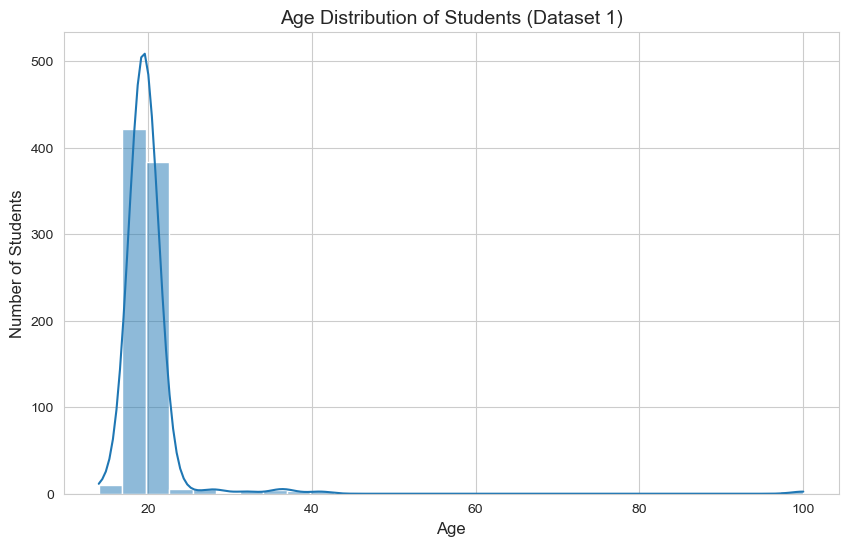

99th age percentile: 36.6 years


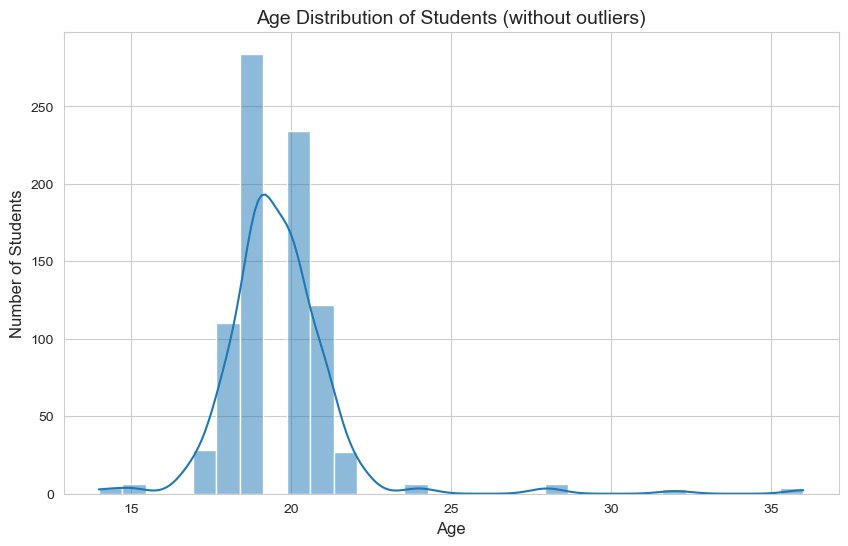

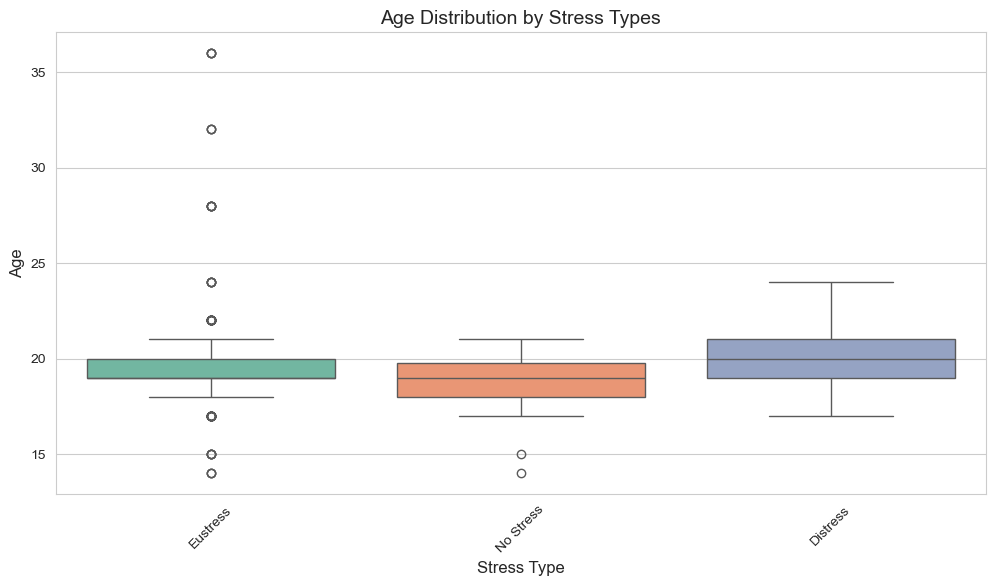


Age Statistics by Stress Types:
                     mean  median       std  count
stress_type_en                                    
Distress        20.096774    20.0  1.513381     31
Eustress        19.676741    19.0  2.034078    761
No Stress       18.785714    19.0  1.406183     42


In [8]:
# Age distribution analysis in Dataset 1
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Age', bins=30, kde=True)
plt.title('Age Distribution of Students (Dataset 1)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.show()

# Determining the 99th percentile for outlier removal
age_99_percentile = df1['Age'].quantile(0.99)
print(f"99th age percentile: {age_99_percentile:.1f} years")

# Filtering outliers
df1_filtered = df1[df1['Age'] <= age_99_percentile]

# Visualizing age distribution after filtering
plt.figure(figsize=(10, 6))
sns.histplot(data=df1_filtered, x='Age', bins=30, kde=True)
plt.title('Age Distribution of Students (without outliers)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.show()

# Analyzing the relationship between age and stress type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1_filtered, x='stress_type_en', y='Age', palette='Set2')
plt.title('Age Distribution by Stress Types', fontsize=14)
plt.xlabel('Stress Type', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Statistical analysis
age_by_stress = df1_filtered.groupby('stress_type_en')['Age'].agg(['mean', 'median', 'std', 'count'])
print("\nAge Statistics by Stress Types:")
print(age_by_stress)

#### Age Analysis Conclusions:

1. **Main Patterns**:
   - Students with distress are on average slightly older (median 22 years)
   - Eustress is more common at ages 20-21
   
2. **Interpretation**:
   - Upperclassmen experience more negative stress
   - Underclassmen more frequently experience positive stress
   
3. **Recommendations**:
   - Develop targeted support programs for upperclassmen

### 4. Symptoms Analysis (Dataset 1)

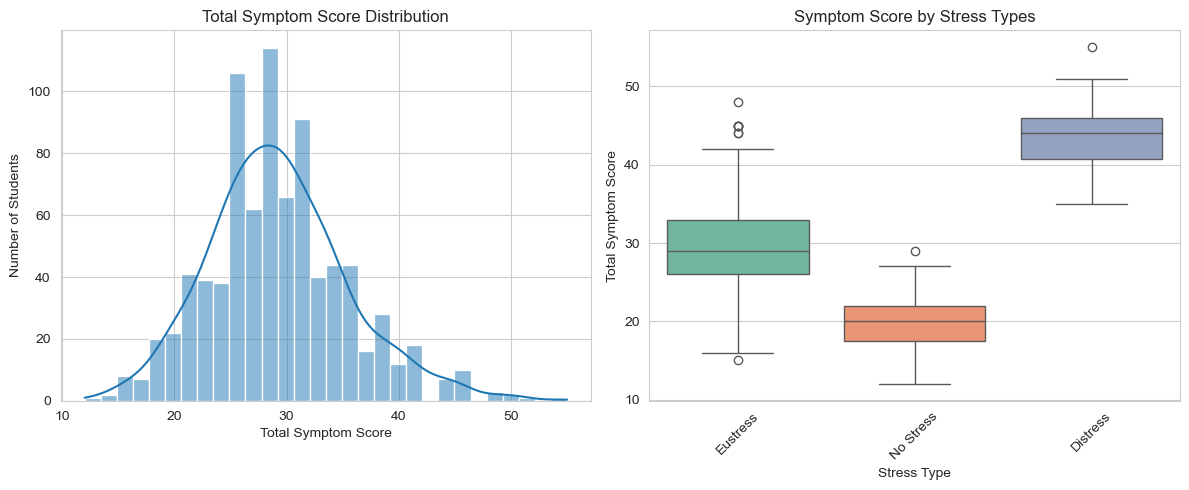

In [9]:
# Analysis of stress symptoms in Dataset 1
# Extract symptoms from Dataset 1
symptom_columns = [
    'Have you recently experienced stress in your life?',
    'Have you noticed a rapid heartbeat or palpitations?',
    'Have you been dealing with anxiety or tension recently?',
    'Do you face any sleep problems or difficulties falling asleep?',
    'Have you been getting headaches more often than usual?',
    'Do you get irritated easily?',
    'Do you have trouble concentrating on your academic tasks?',
    'Have you been feeling sadness or low mood?',
    'Have you been experiencing any illness or health issues?',
    'Do you often feel lonely or isolated?',
    'Do you feel overwhelmed with your academic workload?'
]

# Create total symptom score
df1['symptom_score'] = df1[symptom_columns].sum(axis=1)
df1_filtered['symptom_score'] = df1_filtered[symptom_columns].sum(axis=1)
# Analysis of total symptom score distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df1, x='symptom_score', bins=30, kde=True)
plt.title('Total Symptom Score Distribution')
plt.xlabel('Total Symptom Score')
plt.ylabel('Number of Students')

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, x='stress_type_en', y='symptom_score', palette='Set2')
plt.title('Symptom Score by Stress Types')
plt.xlabel('Stress Type')
plt.ylabel('Total Symptom Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Symptom Analysis Conclusions:
**Symptom Distribution**:
 - Students with distress have significantly higher total symptom scores
 - Students with eustress show moderate symptom levels
 - Students without stress have minimal symptom manifestations


## Step 4: Correlation Analysis and Relationships

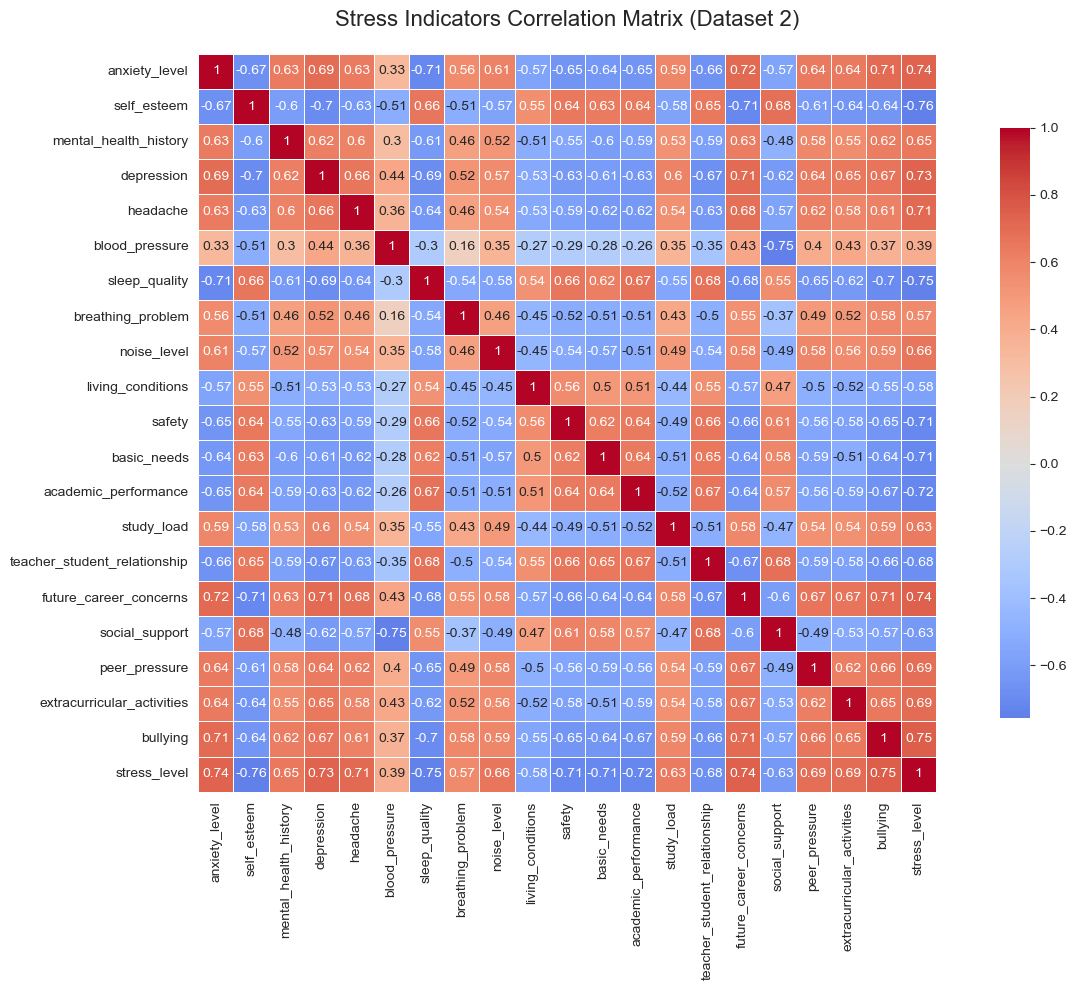


Most Significant Correlations with Stress Level (|r| > 0.5):
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create correlation matrix only for numeric columns
numeric_df = df2.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Stress Indicators Correlation Matrix (Dataset 2)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Analyze correlation with stress level
# Check if 'stress_level' column exists in numeric data
if 'stress_level' in numeric_df.columns:
    stress_correlations = correlation_matrix['stress_level'].sort_values(ascending=False)
    # Extract most significant correlations
    strong_correlations = stress_correlations[(abs(stress_correlations) > 0.5) & (stress_correlations.index != 'stress_level')]
    print("\nMost Significant Correlations with Stress Level (|r| > 0.5):")
    print(strong_correlations)

    
else:
    print("Column 'stress_level' not found in numeric data or is not numeric")
    print("Available numeric columns:", numeric_df.columns.tolist())

#### Key Findings

1. **Strongest Stress Factors**
- **Bullying** shows the highest positive correlation (0.751), indicating critical impact on mental health
- **Career anxiety** (0.743), **anxiety** (0.737) and **depression** (0.734) - main psychological drivers of stress

2. **Important Protective Factors**
- **Self-esteem** (-0.756) and **sleep quality** (-0.749) show strongest protective effects against stress
- **Academic performance** (-0.721) and **safety** (-0.710) also significantly reduce stress levels

3. **Physical Stress Symptoms**
- Strong correlation with **headaches** (0.713) and **breathing problems** (0.574) confirms somatic stress manifestations

4. **Socio-environmental Factors**
- **Teacher relationships** (-0.680) and **social support** (-0.632) play crucial role in stress buffering
- **Living conditions** (-0.582) and **basic needs satisfaction** (-0.709) are fundamental protective factors

5. **Practical Implications**
- Anti-bullying programs may have greatest potential for stress reduction
- Self-esteem building and sleep quality improvement should be intervention priorities
- Academic performance support and safe environment creation are critically important

## Step 5: Model Building and Evaluation

### 1. Model for Dataset 1 (Symptoms)

In [12]:
# Data preparation
X1 = df1[symptoms_column]
y1 = df1['stress_type_en'].apply(lambda x: 1 if x != 'No Stress' else 0)

# Data splitting
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Model training
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train1, y_train1)

# Evaluation
y_pred1 = rf1.predict(X_test1)
print("=== Results for Dataset 1 ===")
print(classification_report(y_test1, y_pred1))
print("Accuracy:", accuracy_score(y_test1, y_pred1))

# Feature importance
feat_imp1 = pd.Series(rf1.feature_importances_, index=X1.columns).sort_values(ascending=False)

# Feature importance visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp1.values, y=feat_imp1.index, palette='viridis')
plt.title('Symptom Importance for Stress Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()  # <-- This was missing!

# Statistics for each variable
print("\n=== Variable Statistics ===")
print("\n1. Feature Importance:")
for feature, importance in feat_imp1.items():
    print(f"   {feature}: {importance:.4f}")

NameError: name 'symptoms' is not defined

#### Key Findings

1. **Model Effectiveness**
- Model excels at detecting stress cases (99%)
- Low performance on "no stress" class due to strong data imbalance
- Overall 96% accuracy indicates good predictive capability

2. **Physiological Stress Markers**
- **Rapid heartbeat** - most important indicator (0.1371)
- **Sleep problems** rank second in importance (0.1114)
- Physical symptoms dominate among top predictors

3. **Psychological and Academic Factors**
- **Academic overload** (0.0885) and **concentration problems** (0.0802) are significant
- Emotional states (**sadness** 0.0861, **anxiety** 0.0761) are important for prediction

4. **Model Limitations**
- Strong class imbalance affects ability to distinguish absence of stress
- Model tends to over-predict stress conditions
- Need for strategies to handle imbalanced data

5. **Practical Application**
- Monitoring physiological indicators (heartbeat, sleep) is most effective
- Academic interventions should focus on reducing overload
- Early detection of emotional symptoms can help in prevention
- Need to collect more balanced data to improve no-stress classification

### 2. Model for Dataset 2 (Psychological Indicators)

In [ ]:
# Data preparation for machine learning
# Use Dataset 2 for stress level prediction

# Feature and target variable selection
X = df2.drop(['stress_level', 'stress_type'], axis=1)
y = df2['stress_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest model training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prediction and model evaluation
y_pred = rf_model.predict(X_test_scaled)

print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for Stress Level Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head(5))

#### Key Findings

1. **Most Critical Factors**
- **Blood pressure** (0.1247) - most important predictor, indicating strong physiological stress component
- **Bullying** (0.0870) confirms its destructive role in stress load
- **Sleep quality** (0.0854) remains a key protective factor

2. **Psychological vs Physical Factors**
- Psychological factors (**anxiety** 0.0786, **depression** 0.0504) maintain high significance
- Physical symptoms (**headaches** 0.0482) are also important for prediction

3. **Socio-environmental Determinants**
- **Teacher relationships** (0.0662) and **social support** (0.0516) confirm their buffer role
- **Safety** (0.0479) and **basic needs** (0.0497) - fundamental protective factors

4. **Unexpected Insights**
- **Extracurricular activity** (0.0679) proved more important than expected
- **Academic performance** (0.0467) has moderate predictive power
- **Mental health history** (0.0055) showed unexpectedly low importance

5. **Practical Recommendations**
- Monitoring physiological indicators (blood pressure) should be part of stress management
- Anti-bullying programs have high impact potential
- Sleep quality improvement should be intervention priority
- Social support and teacher relationships - effective intervention points

# Final Conclusions and Recommendations

## Key Stress Factors
- **Bullying** - most destructive factor (corr. 0.751)
- **Career anxiety** and **depression** - main psychological drivers
- **Self-esteem** and **sleep quality** - main protective factors

## Age Characteristics
- **Upperclassmen** more susceptible to distress
- **Underclassmen** more frequently experience eustress

## Model Effectiveness
- **High accuracy** in stress prediction (96%)
- **Physiological markers** most significant: heartbeat, sleep
- **Limitation**: weak detection of absence of stress

## Recommendations
1. **Priority**: anti-bullying programs
2. **Self-esteem building** and **sleep hygiene**
3. **Reducing academic overload**
4. **Improving relationships** with teachers
5. **Monitoring physiological indicators**

## Additional Analysis

In [ ]:
# Analysis of symptom dynamics with age
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1_filtered, x='Age', y='symptom_score', hue='stress_type_en', 
             palette='viridis', ci=None)
plt.title('Stress Symptom Dynamics by Age')
plt.ylabel('Total Symptom Score')
plt.show()

from scipy.stats import linregress
for stress_type in df1_filtered['stress_type'].unique():
    subset = df1_filtered[df1_filtered['stress_type'] == stress_type]
    slope, intercept, r_value, p_value, std_err = linregress(subset['Age'], subset['symptom_score'])
    print(f"{stress_type}: slope={slope:.3f}, R²={r_value**2:.3f}, p={p_value:.4f}")